In [106]:
import numpy as np
import pandas as pd

In [107]:
anime = pd.read_csv('../src/animes.csv')
anime.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


In [108]:
anime.shape

(19311, 12)

In [109]:
anime.describe()

,uid,episodes,members,popularity,ranked,score
count,19311.000000,18605.000000,1.931100e+04,19311.000000,16099.000000,18732.000000
mean,19358.904096,11.460414,3.472609e+04,7720.830304,6866.524194,6.436107
std,14271.446515,47.950386,1.121772e+05,4676.786104,4390.018768,1.007941
min,1.000000,1.000000,2.500000e+01,1.000000,1.000000,1.250000
25%,4833.500000,1.000000,3.880000e+02,3725.000000,2895.500000,5.770000
50%,18327.000000,2.000000,2.389000e+03,7539.000000,6963.000000,6.410000
75%,33896.500000,12.000000,1.450150e+04,11613.000000,10601.500000,7.150000
max,40960.000000,3057.000000,1.871043e+06,16338.000000,14675.000000,9.230000


In [110]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         19311 non-null  int64  
 1   title       19311 non-null  object 
 2   synopsis    18336 non-null  object 
 3   genre       19311 non-null  object 
 4   aired       19311 non-null  object 
 5   episodes    18605 non-null  float64
 6   members     19311 non-null  int64  
 7   popularity  19311 non-null  int64  
 8   ranked      16099 non-null  float64
 9   score       18732 non-null  float64
 10  img_url     19131 non-null  object 
 11  link        19311 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.8+ MB


In [111]:
anime.drop(columns=['img_url', 'link'], inplace=True)

In [112]:
anime.drop_duplicates(inplace=True)
anime.shape

(16368, 10)

In [113]:
anime.dropna(subset=['episodes', 'title', 'synopsis', 'genre', 'aired', 'ranked'], inplace=True)
anime.shape

(13854, 10)

In [114]:
anime.isnull().sum()

uid           0
title         0
synopsis      0
genre         0
aired         0
episodes      0
members       0
popularity    0
ranked        0
score         0
dtype: int64

In [115]:
# mengklasifikasikan data anime yang populer di 100 besar dengan nilai boolean
anime['is_popular'] = anime['popularity'] <= 100

In [116]:
anime.drop(columns=['uid', 'title', 'synopsis', 'genre', 'aired'], inplace=True)
anime.head()

,episodes,members,popularity,ranked,score,is_popular
0,25.0,489888,141,25.0,8.82,False
1,22.0,995473,28,24.0,8.83,True
2,13.0,581663,98,23.0,8.83,True
3,64.0,1615084,4,1.0,9.23,True
4,1.0,214621,502,22.0,8.83,False


In [117]:
# anime['score'] = pd.cut(x=anime['score'], bins=[0, 4, 7, 10], labels=['Rendah', 'Sedang', 'Tinggi'])
# anime['score'] = anime['score'].map({'Rendah':1, 'Sedang':2, 'Tinggi':3})
# anime.head()

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
print(anime.corr())

            episodes   members  popularity    ranked     score  is_popular
episodes    1.000000  0.054212   -0.038158 -0.056384  0.067698    0.041878
members     0.054212  1.000000   -0.452306 -0.389635  0.402495    0.721195
popularity -0.038158 -0.452306    1.000000  0.840708 -0.677520   -0.139138
ranked     -0.056384 -0.389635    0.840708  1.000000 -0.820660   -0.133279
score       0.067698  0.402495   -0.677520 -0.820660  1.000000    0.157030
is_popular  0.041878  0.721195   -0.139138 -0.133279  0.157030    1.000000


<Axes: >

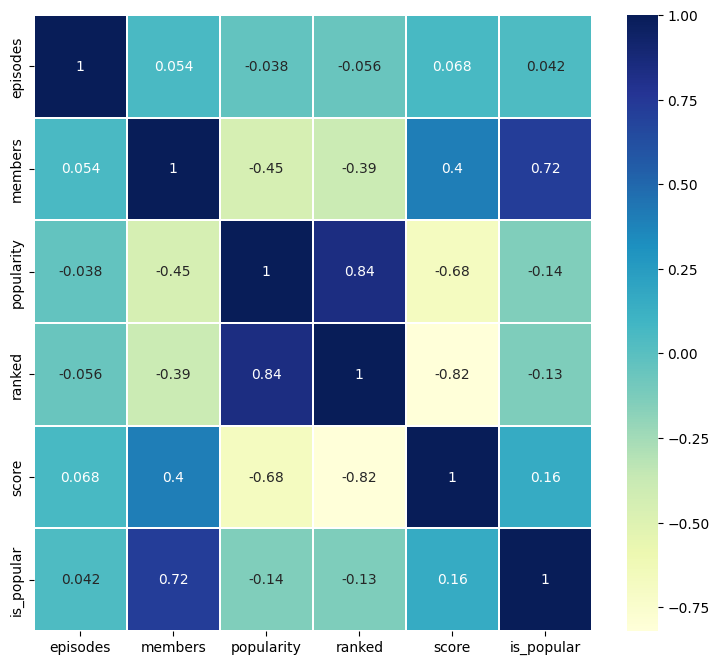

In [120]:
plt.figure(figsize=(9, 8))
sns.heatmap(data=anime.corr(), cmap="YlGnBu", annot=True, linewidths=0.2)

In [121]:
columns_to_keep = ['episodes', 'members', 'popularity', 'score', 'is_popular']
anime[columns_to_keep].dropna()

,episodes,members,popularity,score,is_popular
0,25.0,489888,141,8.82,False
1,22.0,995473,28,8.83,True
2,13.0,581663,98,8.83,True
3,64.0,1615084,4,9.23,True
4,1.0,214621,502,8.83,False
...,...,...,...,...,...
19002,1.0,34155,2382,7.50,False
19003,12.0,61459,1648,7.50,False
19004,12.0,67422,1547,7.56,False
19005,1.0,41077,2154,7.56,False


In [122]:
anime['is_popular'].value_counts()

is_popular
False    13755
True        99
Name: count, dtype: int64

In [123]:
# anime['score'] = anime['score'].map({1:'Rendah', 2:'Sedang', 3:'Tinggi'})

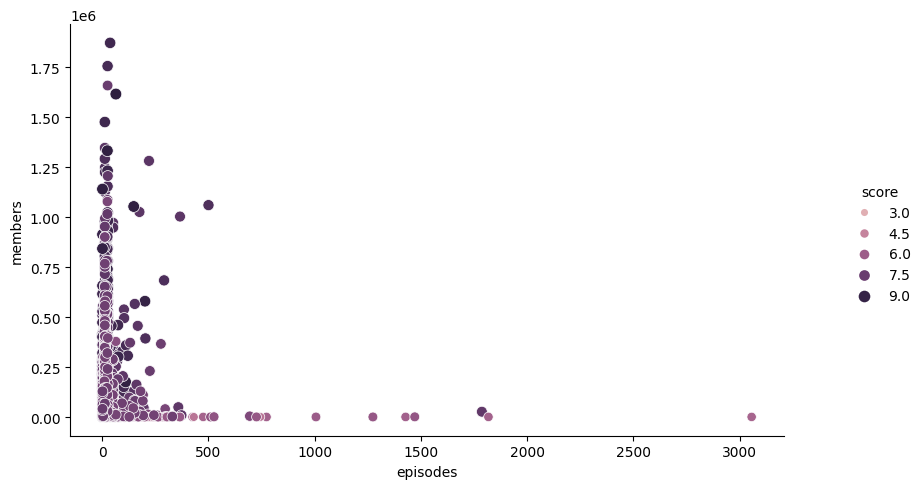

In [124]:
g = sns.relplot(x='episodes', y='members', data=anime, hue='score', size='score')
g.figure.set_size_inches(10,5)
plt.show()

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score, confusion_matrix
import numpy as np

X = anime[['episodes', 'members', 'score']]
y = anime['is_popular']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# train Model

x_pred = model.predict(X_train) # prediksi pada data train
cm = confusion_matrix(y_train, x_pred)

# confusion matrix
print(f'Confusion matrix Naive Bayes\n {cm} \n')
# Akurasi
print(f'Akurasi pada saat training: {accuracy_score(y_train, x_pred)} \n')

# Predictions and performance metrics
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
report = classification_report(y_test, y_pred)


print(f'Confusion matrix Naive Bayes\n {cm} \n')
print('Akurasi pada data test: %.3f' %accuracy)
print('Precision: %.3f' %precision)
print('Recall: %.3f' %recall)
print('F1-score: %.3f' %f1)
print('report')

Confusion matrix Naive Bayes
 [[10816   188]
 [    0    79]] 

Akurasi pada saat training: 0.9830370838220699 

Confusion matrix Naive Bayes
 [[2711   40]
 [   0   20]] 

Akurasi pada data test: 0.986
Precision: 0.333
Recall: 1.000
F1-score: 0.986
report
